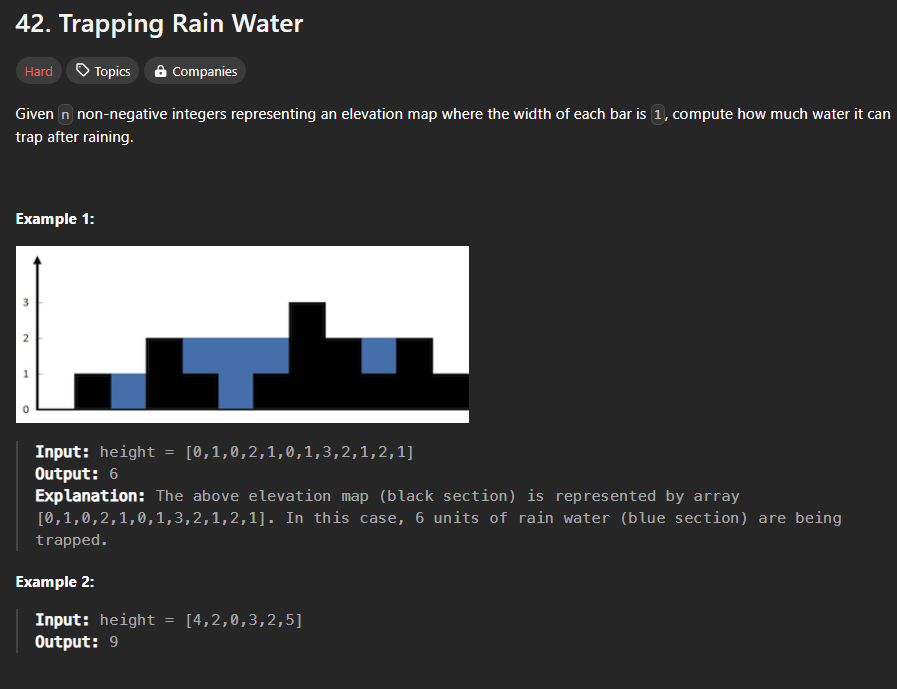

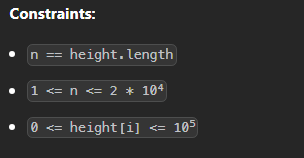

1 left 1 right = 1 water
1 left 2 right = 1 water
1 left 3 right = 1 water

so, if either left or right is 1, it can only has 1 water

2 left 1 right = 1 water
2 left 2 right = 2 water
2 left 3 right = 2 water
2 left 4 right = 2 water

so, if either left or right is 2, it can only has 2 waters. except if it has 1 wall

In [ ]:
class Solution(object):
    def trap(self, height):

        n = len(height)
        
        max_left = [0] * n
        max_right = [0]* n
        water = 0

        # left max
        max_left[0] = height[0]
        for i in range(1, n):
            max_left[i] = max(max_left[i-1], height[i])

        # right max
        max_right[n-1] = height[n-1]
        for i in range(n-2, -1, -1):
            max_right[i] = max(max_right[i+1], height[i])

        for i in range(n):
            water += min(max_left[i],max_right[i]) - height[i]


        return water
    
solution = Solution()
print(solution.trap([0,1,0,2,1,0,1,3,2,1,2,1]))

            
            




6


# Trapping Rain Water Problem Explanation

## **Problem Statement**
Given an array `height[]` representing the elevation map, where the width of each bar is `1`, compute how much water it can trap after raining.

### **Understanding the Problem**
Water is trapped between bars (elevation heights) when a lower elevation exists between two higher elevations. To determine the amount of trapped water at any index `i`, we need to consider the **tallest** bars to the **left and right** of that index.

### **Approach: Precompute Left and Right Max Heights**
To efficiently calculate the trapped water at each index, we precompute two arrays:

1. `leftMax[i]`: The **tallest** bar from the left (including `i` itself).
2. `rightMax[i]`: The **tallest** bar from the right (including `i` itself).

### **Steps to Solve**
1. **Compute `leftMax[]` array**
   - Traverse from **left to right** and store the max height seen so far at each index.
   - Example:
     ```python
     leftMax[i] = max(leftMax[i - 1], height[i])
     ```
   
2. **Compute `rightMax[]` array**
   - Traverse from **right to left** and store the max height seen so far at each index.
   - Example:
     ```python
     rightMax[i] = max(rightMax[i + 1], height[i])
     ```
   
3. **Calculate trapped water**
   - The water trapped at index `i` is determined by:
     ```python
     water_at_i = min(leftMax[i], rightMax[i]) - height[i]
     ```
   - If `min(leftMax[i], rightMax[i])` is greater than `height[i]`, water is trapped.
   - Sum this up for all indices to get the total trapped water.

### **Code Implementation**
```python
def trap(height):
    if not height:
        return 0

    n = len(height)
    leftMax = [0] * n
    rightMax = [0] * n
    water = 0

    # Compute leftMax array
    leftMax[0] = height[0]
    for i in range(1, n):
        leftMax[i] = max(leftMax[i - 1], height[i])

    # Compute rightMax array
    rightMax[n - 1] = height[n - 1]
    for i in range(n - 2, -1, -1):
        rightMax[i] = max(rightMax[i + 1], height[i])

    # Calculate trapped water
    for i in range(n):
        water += min(leftMax[i], rightMax[i]) - height[i]

    return water
```

### **Time & Space Complexity**
- **Time Complexity:** `O(n)`, since we traverse the array **three times** (leftMax, rightMax, and water calculation).
- **Space Complexity:** `O(n)`, due to storing `leftMax[]` and `rightMax[]` arrays.

### **Optimized Two-Pointer Approach (O(1) Space)**
Instead of using extra arrays, we can use **two pointers** (`left` and `right`) to dynamically track `leftMax` and `rightMax` while traversing the array **only once**.

#### **Key Idea:**
- Maintain `leftMax` and `rightMax` **as single variables** instead of full arrays.
- Use **two pointers** (`left` at start, `right` at end) and move towards each other.
- Always process the **shorter** boundary first (because that determines the trapped water at that point).

#### **Code for Two-Pointer Approach:**
```python
def trap(height):
    if not height:
        return 0
    
    left, right = 0, len(height) - 1
    leftMax, rightMax = height[left], height[right]
    water = 0
    
    while left < right:
        if leftMax < rightMax:
            left += 1
            leftMax = max(leftMax, height[left])
            water += leftMax - height[left]
        else:
            right -= 1
            rightMax = max(rightMax, height[right])
            water += rightMax - height[right]
    
    return water
```

### **Time & Space Complexity for Two-Pointer Approach**
- **Time Complexity:** `O(n)`, as we traverse the array **once**.
- **Space Complexity:** `O(1)`, since we use only a few extra variables.

---

### **Final Thoughts**
- **Precompute `leftMax` and `rightMax` if memory is not a concern (`O(n)` space).**
- **Use the two-pointer approach if you want an optimized `O(1)` space solution.**
- **Both approaches solve the problem in `O(n)` time.**
- **This pattern (left & right bounds) appears in other problems too—understanding it will help in future problems!**



In [ ]:
     #
#....#
#..#.#
##.###
##.###
